In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
data = pd.read_csv('train.csv')

In [30]:
data = np.array(data)

In [31]:
label = data[:,0][np.newaxis].T
train = data[0:10000,1:]
test = data[10000:20000,1:]
m,n = train.shape

def forward_propagation(x, thetaih,biasih, thetaho, biasho ):
    ah = np.dot(thetaih,x.T) + biasih
    gh = 1/(1 + np.exp(-ah))
    ao = np.dot(thetaho,gh) + biasho
    go = 1/(1 + np.exp(-ao))
    
    return ah,gh,ao,go
    
def back_propagation(go,label,gh,alpha,thetaho,x1_train ):
    delo = go.copy()
    delo[label] -= 1
    up_thetaho = (np.dot(delo, gh.T))*(-alpha)
    up_biasho = (delo)*(-alpha)
    delh = (thetaho.T@delo)*((gh)*(1-gh))
    up_thetaih = (np.dot(delh, x1_train))*(-alpha)
    up_biasih = (delh)*(-alpha)
    
    return up_thetaho,up_biasho,up_thetaih,up_biasih

def update_parameters(thetaho,biasho,thetaih,biasih, up_thetaho,up_biasho,up_thetaih,up_biasih ):
    thetaho += up_thetaho
    biasho += up_biasho
    thetaih += up_thetaih
    biasih += up_biasih
    
    return thetaho,biasho,thetaih,biasih

def get_accuracy(correct_predictions,no_predictions):
    print("Accuracy after ", no_predictions , " predictions",  100*(correct_predictions/no_predictions) )
    
    
    

In [32]:
biasih = np.random.rand(10,1)
biasho = np.random.rand(10,1)
thetaih = np.random.rand(10,n)
thetaho = np.random.rand(10,10)
thetaih = thetaih - 0.5
thetaho = thetaho - 0.5
biasih = biasih - 0.5
biasho = biasho - 0.5
alpha = 0.01 #learning rate

correct_predictions = 0
no_predictions = 0

for round in range(100):
    for i in range(m):
        x1_train = train[i,:][np.newaxis]
        x1_train = x1_train/255 
        
        #forward propagation
        ah,gh,ao,go = forward_propagation(x1_train, thetaih,biasih, thetaho, biasho )
        
        if(np.argmax(go)==label[i]):
            correct_predictions+=1
        no_predictions+=1
        
        
        #backward propagation
        up_thetaho,up_biasho,up_thetaih,up_biasih = back_propagation(go,label[i],gh,alpha,thetaho,x1_train)
        
        #updating parameters
        thetaho,biasho,thetaih,biasih = update_parameters(thetaho,biasho,thetaih,biasih, up_thetaho,up_biasho,up_thetaih,up_biasih )
        
    get_accuracy(correct_predictions,no_predictions)

    



Accuracy after  10000  predictions 61.78
Accuracy after  20000  predictions 73.065
Accuracy after  30000  predictions 78.03999999999999
Accuracy after  40000  predictions 80.88499999999999
Accuracy after  50000  predictions 82.758
Accuracy after  60000  predictions 84.12666666666667
Accuracy after  70000  predictions 85.17714285714287
Accuracy after  80000  predictions 86.00999999999999
Accuracy after  90000  predictions 86.69
Accuracy after  100000  predictions 87.26
Accuracy after  110000  predictions 87.75
Accuracy after  120000  predictions 88.1725
Accuracy after  130000  predictions 88.55384615384615
Accuracy after  140000  predictions 88.89857142857143
Accuracy after  150000  predictions 89.20866666666667
Accuracy after  160000  predictions 89.49312499999999
Accuracy after  170000  predictions 89.75529411764705
Accuracy after  180000  predictions 89.99555555555555
Accuracy after  190000  predictions 90.21736842105264
Accuracy after  200000  predictions 90.423
Accuracy after  2100

Image selected :


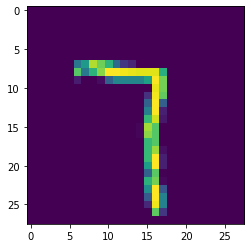

Prediction:  7


C:\Users\tejabale\AppData\Local\Temp\ipykernel_8412\320924301.py:9: RuntimeWarning: overflow encountered in exp
  gh = 1/(1 + np.exp(-ah))


In [34]:
#choosing images other than the training set to check results
#choose some number between (10,000 - 20,000)
number = 10382
img = data[number,1:].copy()
img2 = img.copy()
img2.resize(28,28)
print("Image selected :")
plt.imshow(img2,interpolation='nearest')
plt.show()
ah,gh,ao,go = forward_propagation(img[np.newaxis], thetaih,biasih, thetaho, biasho )
print("Prediction: ",np.argmax(go))